**Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.**

 **Описание данных**
 - timestamp – дата и время (точность до часа)
 - cnt – количество аренд велосипедов за этот час
 - t1 – температура, в С
 - t2 – температура "ощущается как", в С 
 - hum – влажность (%)
 - wind_speed – скорость ветра, км/ч
 - weather_code – погодные условия:
   - 1 – ясно (SKC)
   - 2 – преимущественно ясно / встречаются отдельные облака (SCT)
   - 3 – облачно / значительные облака (BKN)
   - 4 – пасмурно (OVC)
   - 7 – небольшой дождь Rain/ light Rain shower/ Light rain 
   - 10 – дождь с грозой
   - 26 – снегопад 
   - 94 – ледяной туман (да, такое бывает!)
 - isholiday – является ли день праздником (1 – праздник, 0 – нет)
 - isweekend –  является ли день выходным (1 – выходной, 0 – нет)
 - season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)


 **Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.**

**Есть ли в данных пропущенные значения?**

In [1]:
#Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
# Считываем данные из .csv файла

df = pd.read_csv('london.csv')

In [3]:
# Проверяем информацию о ДФ

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


**Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

 - по оси x – дата (timestamp)
 - по оси y – число поездок (cnt)


 **Выберите верные утверждения:**
 - В выходные поездок точно меньше, чем в будние дни
 - Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды **(+)**
 - Случались только аномальные скачки вверх, вниз ничего не падало

In [6]:
# Изменяем формат колонки 'timestamp' на datetime для корректного оформления оси Х графиков

df['timestamp'] = pd.to_datetime(df.timestamp)

In [7]:
# Устанавливаем настройки графика

sns.set(font_scale = 1.5,
        rc         = {'figure.figsize':(20,7)})

sns.set_style('darkgrid',
             {'axes.facecolor': '0.9',
              'grid.color': '0.5',
              'figure.facecolor': '0.95'})

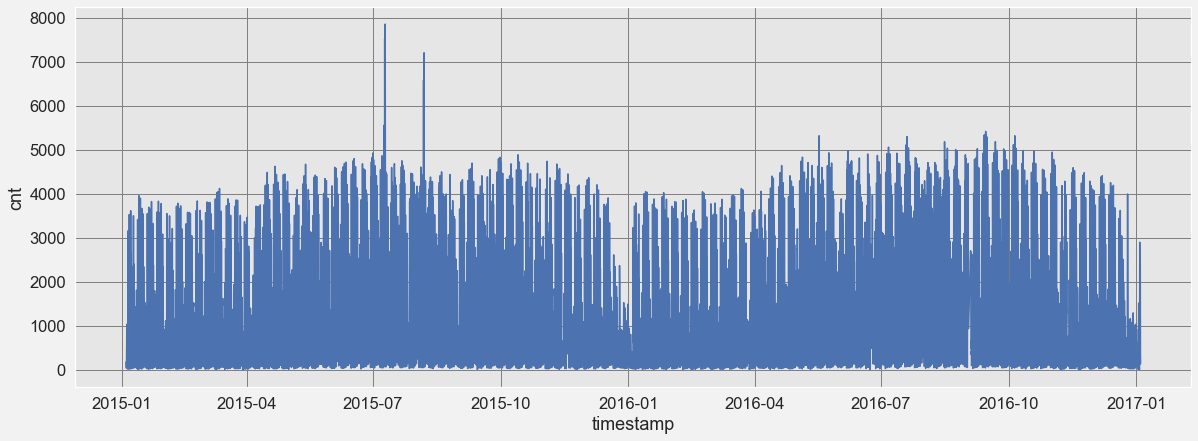

In [8]:
ax = sns.lineplot(x='timestamp', y = 'cnt', data = df)

# Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды

**Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут.** 

**Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?**

<AxesSubplot:xlabel='timestamp'>

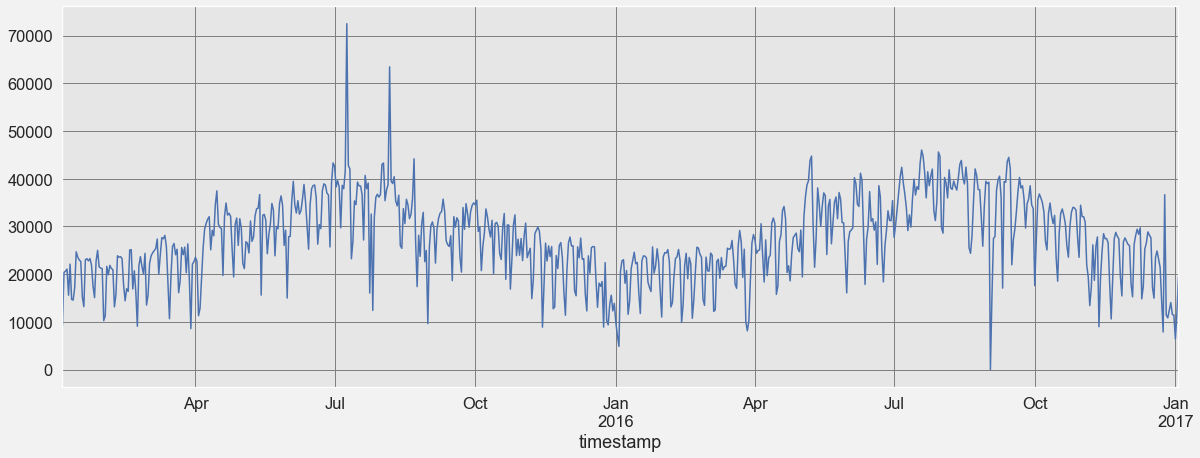

In [9]:
df.set_index('timestamp')\
  .resample('d')\
  .cnt.sum()\
  .plot()

**Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.**

**Для этого разделим дальнейшие действия на несколько этапов:**

 - сначала посчитаем скользящее среднее, чтобы сгладить ряд**
 - далее – разницу между наблюдаемыми и сглаженными значениями
 - определим верхние и нижние границы 99% доверительного интервала 
   найдем причины аномалий!

**На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.**

In [10]:
df = df.set_index('timestamp')

In [11]:
df.resample('d')\
  .cnt\
  .sum()\
  .rolling(3)\
  .mean()['2015-07-09']

50705.0

**Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:**

c = a - b

std = np.std(c)

**В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.**

In [12]:
# Агрегация cnt по дням без скользящего среднего

a = df.resample('d')\
      .cnt\
      .sum()

In [13]:
# Агрегация cnt по дням со скользящим средним

b = df.resample('d')\
      .cnt\
      .sum()\
      .rolling(3)\
      .mean()

In [14]:
# Путем вычитания b из a находим разницу с

c = a - b

In [15]:
# Высчитываем стандартное отклонение значений с

std = np.std(c).round(2)
std

4558.59

**Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:**

 - upper_bound – верхняя граница; к средним прибавляем 2.576∗std
 - lower_bound – нижняя граница; вычитаем 2.576∗std

**Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.**

**Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.**

**Note: в качестве std нужно брать стандартное отклонение без округления.**

**Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().**

In [16]:
# Переформатируем ДФ: групировка по дням и сумма по cnt, с обновлением индекса.

df_grouped_by_d = df.resample('d')\
       .cnt\
       .sum()\
       .to_frame()\
       .reset_index()

In [17]:
# Создаем ДФ для ранее вычисленного скользящего среднего

rolled_cnt = b.to_frame()\
              .reset_index()

In [18]:
# Добавляем колонку со скользящим средним в ДФ df_grouped_by_d

df_grouped_by_d['rolled_cnt'] = rolled_cnt['cnt']

In [19]:
df_grouped_by_d

,timestamp,cnt,rolled_cnt
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


In [20]:
# Считаем стандартное отклонение без округления

std = np.std(c)

In [21]:
# Создаем колонки upper_bound и lower_bound

df_grouped_by_d['upper_bound'] = df_grouped_by_d['rolled_cnt'] + 2.576*std
df_grouped_by_d['lower_bound'] = df_grouped_by_d['rolled_cnt'] - 2.576*std

In [22]:
df_grouped_by_d

,timestamp,cnt,rolled_cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,30835.585854,7349.747479
...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,21632.252521,-1853.585854


In [23]:
df_grouped_by_d['upper_bound'][730].round(2)

24302.92

**И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.**

**В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.**

In [24]:
df_grouped_by_d_1 = df_grouped_by_d.fillna(value = 0)

In [25]:
df_grouped_by_d_1.loc[df_grouped_by_d_1['upper_bound'] < df_grouped_by_d_1['cnt']]

,timestamp,cnt,rolled_cnt,upper_bound,lower_bound
0,2015-01-04,9234,0.000000,0.000000,0.000000
1,2015-01-05,20372,0.000000,0.000000,0.000000
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479


**Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google.** 

**В качестве ответа выберите наиболее вероятную причину столь резкого скачка:**

 - Погода
 - Забастовки в метро **(+ из Google)**
 - Ошибка при сборе данных
 - Ветер
 - Выборы

**Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?**

In [27]:
df_grouped_by_d_1.loc[df_grouped_by_d_1['lower_bound'] > df_grouped_by_d_1['cnt'], ['timestamp','cnt']]

,timestamp,cnt
130,2015-05-14,15609
189,2015-07-12,23240
201,2015-07-24,16034
232,2015-08-24,17400
314,2015-11-14,8898
607,2016-09-02,0
615,2016-09-10,17080
621,2016-09-16,21967
678,2016-11-12,8990


**Вывод:** для 2016-09-02 значение cnt составляет 0, при этом в соседние дни таких падений не наблюдается, это может свидетельствовать об ошибке при сборе данных 